## Observations and Insights 

1. Mice treated with Capomulin and Ramincane had the lowest average tumor volumes (40.676 mm3 and 40.217 mm3 respectively), suggesting that these two drug regimens would be the most promising ones among the 10 analyzed drugs. 

2. Besides, sample sizes of Capomulin and Ramincane were the only two that were above 200 mice, while those of the other drugs were below 200. The combination of lower average tumor volume and larger sample sizes further supports the observation that these two drugs would have better therapeutic effect on mice.

3. The split of female and male mice in the total number of studied mice was around 50/50. This suggests that sex would not likely be a significant factor in the efficacy of the drugs. However, to determine whether sex might play any role in the drugs' efficacy, a further analysis of the proportion of female and male mice studied for each drug regimen, in comparison with the tumor volume post treatment, could be considered.

4. The analysis of Capomulin shows that a mouse's weight and average tumor volume are linearly correlated, with correlation coefficient being 0.84, suggesting significant correlation.

## Data Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(complete_data['Mouse ID'].unique())

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

tumor_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

tumor_var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

tumor_stdev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

tumor_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

regimen_sum1 = pd.DataFrame({
    'Tumor Volume Mean': tumor_mean,
    'Tumor Volume Median': tumor_median,
    'Tumor Volume Variance': tumor_var,
    'Tumor Volume Standard Deviation': tumor_stdev,
    'Tumor Volume SEM': tumor_sem
}).round(3)

regimen_sum1

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

regimen_sum2 = clean_data.groupby('Drug Regimen').agg(
    tumor_vol_mean=('Tumor Volume (mm3)',np.mean),
    tumor_vol_median=('Tumor Volume (mm3)',np.median),
    tumor_vol_var=('Tumor Volume (mm3)',np.var),
    tumor_vol_stdev=('Tumor Volume (mm3)',np.std),
    tumor_vol_SEM=('Tumor Volume (mm3)',st.sem),
).round(3)

regimen_sum2

,tumor_vol_mean,tumor_vol_median,tumor_vol_var,tumor_vol_stdev,tumor_vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

(0, 250)

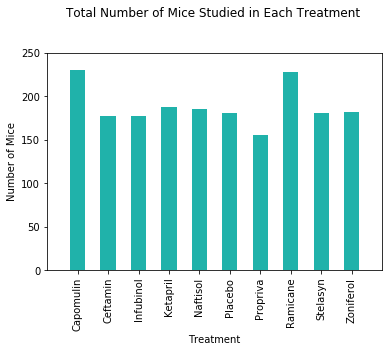

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Create new DataFrame by grouping by the types of drugs and count the number mice for each drug
mice_num = clean_data.groupby('Drug Regimen')['Mouse ID'].count()

# Plot the bar chart
mice_num.plot(kind="bar", facecolor="lightseagreen")
plt.title('Total Number of Mice Studied in Each Treatment \n \n')
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')
plt.xlim(-1, 10)
plt.ylim(0, 250)

(0, 250)

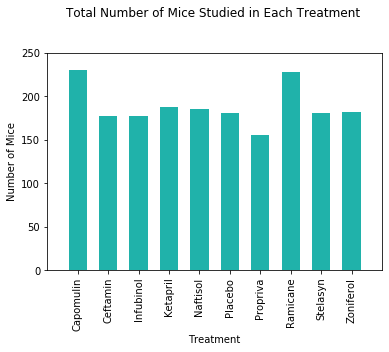

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create new DataFrame by grouping by the types of drugs and count the number mice for each drug
# Also, drop the index
mice_num = clean_data.groupby('Drug Regimen')['Mouse ID'].count().reset_index()

# Generate series for plotting bar chart
regimen = mice_num['Drug Regimen']
mice_count = mice_num['Mouse ID']

# Set x-axis and tick locations
x_axis = np.arange(len('mice_count'))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mice_count, color='lightseagreen', width=0.6, align='center')
plt.xticks(tick_locations, mice_num['Drug Regimen'], rotation='vertical')
plt.title('Total Number of Mice Studied in Each Treatment \n \n')
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(mice_num['Mouse ID']+20))


Text(0, 0.5, '')

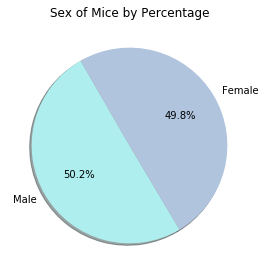

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create DataFrame to count the number of females and males 
mice_sex = complete_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Plot pie chart
mice_sex.plot.pie(figsize=(4.5, 4.5), autopct='%1.1f%%',
                  shadow=True, colors =['paleturquoise','lightsteelblue'],
                  startangle=120)
plt.title('Sex of Mice by Percentage')
plt.ylabel('')

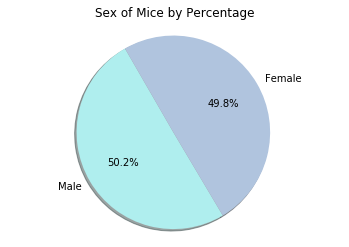

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = complete_data.drop_duplicates(subset='Mouse ID')['Sex'].unique()
colors = ['paleturquoise','lightsteelblue']

plt.pie(mice_sex, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.axis('equal')
plt.title('Sex of Mice by Percentage')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Reduce DataFrame to the four selected drugs
treatment_data = clean_data.loc[
    (clean_data['Drug Regimen'] == 'Capomulin')|
    (clean_data['Drug Regimen'] == 'Ramicane')|
    (clean_data['Drug Regimen'] == 'Infubinol')|
    (clean_data['Drug Regimen'] == 'Ceftamin')][['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Get the last (greatest) timepoint for each mouse
last_timepoint = treatment_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_merge = pd.merge(treatment_data, last_timepoint, on='Mouse ID')

# Rename columns
treatment_merge = treatment_merge.rename(columns={
    'Timepoint_x': 'Timepoint',
    'Timepoint_y': 'Last Timepoint'
})

# Get the tumor volume at the last timepoint
last_tumor_vol = treatment_merge[(treatment_merge['Timepoint'] == treatment_merge['Last Timepoint'])]

last_tumor_vol

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Last Timepoint
9,Ramicane,k403,45,22.050126,45
19,Capomulin,s185,45,23.343598,45
29,Capomulin,x401,45,28.484033,45
39,Capomulin,m601,45,28.430964,45
49,Ramicane,g791,45,29.128472,45
...,...,...,...,...,...
773,Ceftamin,x822,45,61.386660,45
783,Infubinol,y163,45,67.685569,45
793,Ceftamin,y769,45,68.594745,45
803,Ceftamin,y865,45,64.729837,45


In [13]:
# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
    # Determine outliers using upper and lower bounds

for drug in drug_list:
    boxplot_list.append(last_tumor_vol[(last_tumor_vol['Drug Regimen'] == drug)]['Tumor Volume (mm3)'])
    quartiles = last_tumor_vol[(last_tumor_vol['Drug Regimen'] == drug)]['Tumor Volume (mm3)'].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f'IQR data of tumor volume when treating with {drug}:')
    print(f'Lower quartile: {lowerq}')
    print(f'Upper quartile: {upperq}')
    print(f'Interquartile range: {iqr}')
    print(f'Median: {quartiles[0.5]}')
    print(f'Values below {lower_bound} could be outliers.')
    print(f'Values above {upper_bound} could be outliers.')
    print(f"-------------------------------------------------------")
    

IQR data of tumor volume when treating with Capomulin:
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile range: 7.78
Median: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------------------------
IQR data of tumor volume when treating with Ramicane:
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile range: 9.1
Median: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
-------------------------------------------------------
IQR data of tumor volume when treating with Infubinol:
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile range: 11.48
Median: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
-------------------------------------------------------
IQR data of tumor volume when treating with Ceftamin:
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile range: 15.58
Median: 59.85
Values below 25.35 could be outliers.
Values above

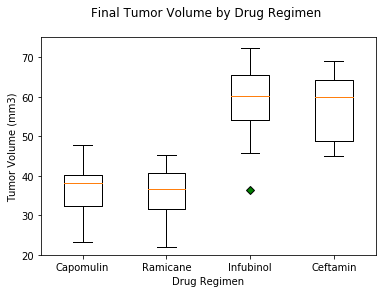

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Drug Regimen \n')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(boxplot_list, flierprops=green_diamond)
ax.set_xticklabels(drug_list)

plt.ylim(20, 75)

plt.show()


## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create DataFrame holding just Capomulin's data and set index to Mouse ID
capomulin_data = treatment_data[(treatment_data['Drug Regimen'] == 'Capomulin')]
del capomulin_data['Drug Regimen']
capomulin_data.set_index('Mouse ID').head()

# Collect the mouse ID e.g. s185, x401 etc.
mouse = input('Please enter the mouse ID to view tumor volume data: ')

Please enter the mouse ID to view tumor volume data:  s185


In [31]:
# Reduce DataFrame to just data related to input
mouse_data = capomulin_data[(capomulin_data['Mouse ID'] == mouse)]

# Create a series that looks for a mouse by mouse ID
# and then traces their tumor volume over time
tumor_vol_time = mouse_data['Tumor Volume (mm3)']
timepoints = mouse_data['Timepoint']

(23.34359787, 47.0)

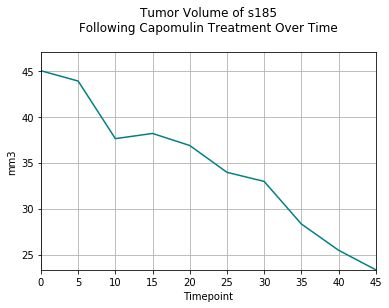

In [42]:
# Generate line plot
plt.plot(timepoints, tumor_vol_time, color='teal')

plt.title('Tumor Volume of ' + mouse + '\nFollowing Capomulin Treatment Over Time\n')
plt.ylabel('mm3')
plt.xlabel('Timepoint')
plt.grid()
plt.xlim(0, max(timepoints))
plt.ylim(min(tumor_vol_time), max(tumor_vol_time)+2)

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create another DataFrame to hold just Capomulin data
capomuli_data_2 = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')][[
    'Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

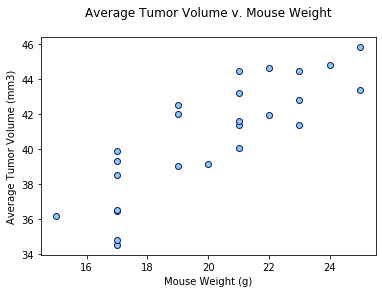

In [47]:
# Calculate the average tumor volume of each mouse
capomuli_data_2['Average Tumor Volume (mm3)'] = capomuli_data_2.groupby('Mouse ID')['Tumor Volume (mm3)'].transform('mean')

# Clean up data to hold each mouse's average tumor volume and weight only
clean_capomuli = capomuli_data_2.drop_duplicates(subset=['Mouse ID'])
del clean_capomuli['Tumor Volume (mm3)']

# Get the weght and average tumor volume for plotting
weight = clean_capomuli['Weight (g)']
avg_tumor_vol = clean_capomuli['Average Tumor Volume (mm3)']

# Generate scatter plot
plt.scatter(
    weight, avg_tumor_vol, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.title('Average Tumor Volume v. Mouse Weight\n')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


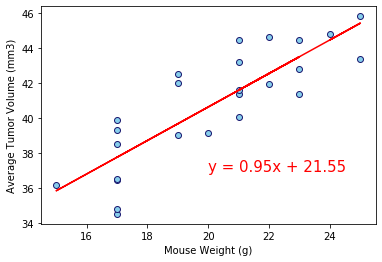

In [50]:
# Add linear regression model to scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(
    weight, avg_tumor_vol, 
    marker='o', 
    facecolors='skyblue', 
    edgecolors='midnightblue')
plt.plot(weight, regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
